In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
df=pd.read_excel("Churn (1).xlsx")

# EDA

In [343]:
# change column name
df.rename(columns={'area.code':'area_code'},inplace=True)
df.rename(columns={'account.length':'account_length'},inplace=True)
df.rename(columns={'voice.plan':'voice_plan'},inplace=True)
df.rename(columns={'voice.messages':'voice_messages'},inplace=True)
df.rename(columns={'intl.plan':'intl_plan'},inplace=True)
df.rename(columns={'intl.mins':'intl_mins'},inplace=True)
df.rename(columns={'intl.calls':'intl_calls'},inplace=True)
df.rename(columns={'intl.charge':'intl_charge'},inplace=True)
df.rename(columns={'day.mins':'day_mins'},inplace=True)
df.rename(columns={'day.calls':'day_calls'},inplace=True)
df.rename(columns={'day.charge':'day_charge'},inplace=True)
df.rename(columns={'eve.mins':'eve_mins'},inplace=True)
df.rename(columns={'eve.calls':'eve_calls'},inplace=True)
df.rename(columns={'eve.charge':'eve_charge'},inplace=True)
df.rename(columns={'night.mins':'night_mins'},inplace=True)
df.rename(columns={'night.calls':'night_calls'},inplace=True)
df.rename(columns={'night.charge':'night_charge'},inplace=True)
df.rename(columns={'customer.calls':'customer_calls'},inplace=True)

In [344]:
df.head()

,Unnamed: 0,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,...,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


## Data Cleaning

In [345]:
#There is already a index column in the data, so drop the column to avoid further complication
df.drop(columns="Unnamed: 0",axis=1,inplace=True)
df.head()

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [346]:
df.shape

(5000, 20)

In [347]:
df.columns

Index(['state', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn'],
      dtype='object')

In [348]:
df.dtypes

,0
state,object
area_code,object
account_length,int64
voice_plan,object
voice_messages,int64
intl_plan,object
intl_mins,float64
intl_calls,int64
intl_charge,float64
day_mins,float64


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   object 
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   object 
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      5000 non-null   object 
 12  eve_mins        5000 non-null   object 
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

▶ Both day charge and eve.mins have wrong datatypes so conversion is needed.

In [350]:
#changing Datatype to more suitable ones
df[["day_charge","eve_mins"]]=df[["day_charge","eve_mins"]].astype("float")

In [351]:
df.describe()

,account_length,voice_messages,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4993.000000,4976.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,30.653501,200.580326,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,9.166356,50.554637,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.275000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [352]:
df.duplicated().sum()

0

In [353]:
df.isnull().sum()

,0
state,0
area_code,0
account_length,0
voice_plan,0
voice_messages,0
intl_plan,0
intl_mins,0
intl_calls,0
intl_charge,0
day_mins,0


presence of null value is confirmed so need to treat it

In [354]:
df[["day_charge"]]=df[["day_charge"]].fillna(df["day_charge"].mean())
df[["eve_mins"]]=df[["eve_mins"]].fillna(df["eve_mins"].mean())

In [355]:
df.ndim

2

▶▶ **There are two types of data**
- *Categorical Data* (Two or more values and without any order)
  
    - State :name of the state
    - area.code :Code is cotegorized into 3 types (408,415,510)
    - voice.plan  :whether the customer has voice plan or not (yes/no)
    - intl.plan :whether the customer has international plan or not (yes/no)
- *Numerical data*  (numbers, not words or descriptions)
    - Columns except numerical columns and chur column (target) are numerical data

In [356]:
data_num=df.select_dtypes(exclude='object')
data_num.head()

,account_length,voice_messages,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
0,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
1,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
2,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
3,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
4,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3


In [357]:
data_cat=df.select_dtypes(include='object')
data_cat.head()

,state,area_code,voice_plan,intl_plan,churn
0,KS,area_code_415,yes,no,no
1,OH,area_code_415,yes,no,no
2,NJ,area_code_415,no,no,no
3,OH,area_code_408,no,yes,no
4,OK,area_code_415,no,yes,no


##Visualization

### PieChart

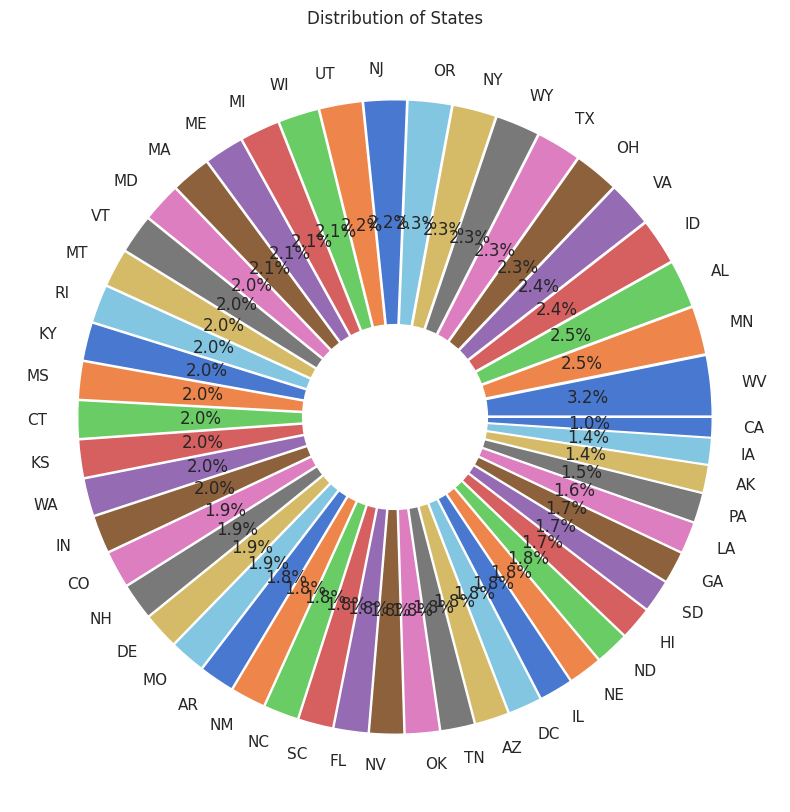

,count
state,
WV,158
MN,125
AL,124
ID,119
VA,118
OH,116
TX,116
WY,115
NY,114


In [358]:
state=df['state'].value_counts()
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
sns.set_palette('muted')
plt.title('Distribution of States')
plt.pie(state,labels=state.index,autopct='%1.1f%%',explode=[0.03]*51)
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()
#count of the states
state

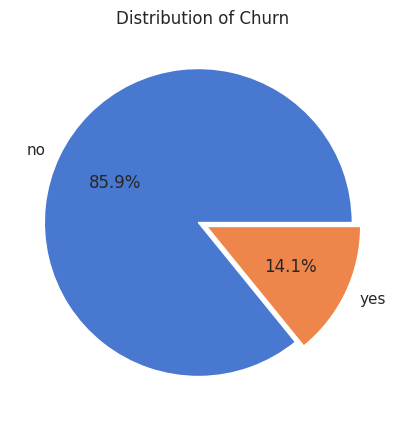

,count
churn,
no,4293
yes,707


In [359]:
churn=df['churn'].value_counts()
plt.figure(figsize=(10,5))
sns.set_theme(style='darkgrid')
sns.set_palette('muted')
plt.title('Distribution of Churn')
plt.pie(churn,labels=churn.index,autopct='%1.1f%%',explode=[0.03]*2)
plt.show()
churn

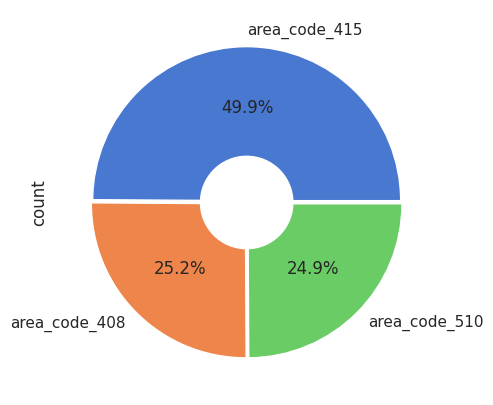

,count
area_code,
area_code_415,2495
area_code_408,1259
area_code_510,1246


In [360]:
area_code=df['area_code'].value_counts()
plt.figure(figsize=(10,5))
df["area_code"].value_counts().plot(kind="pie",autopct="%1.1f%%",explode=(0.012,0.012,0.012))
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()
area_code

* majority of user are from area.code 415

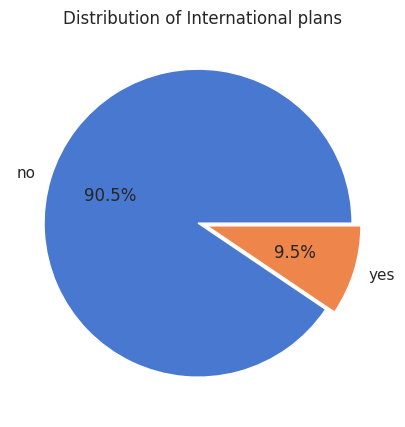

,count
intl_plan,
no,4527
yes,473


In [361]:
int_plan=df['intl_plan'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(int_plan,labels=int_plan.index,autopct='%1.1f%%',explode=[0.03]*2)
plt.title('Distribution of International plans')
plt.show()
int_plan

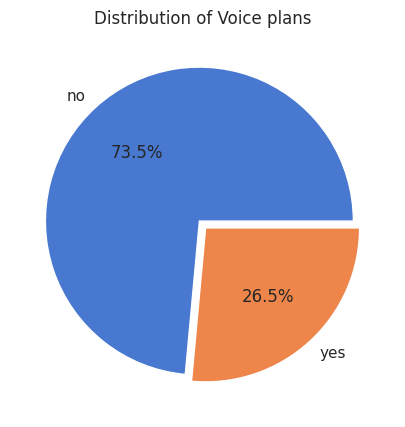

,count
voice_plan,
no,3677
yes,1323


In [362]:
voice_plan=df['voice_plan'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(voice_plan,labels=voice_plan.index,autopct='%1.1f%%',explode=[0.03]*2)
plt.title('Distribution of Voice plans')
plt.show()
voice_plan

### Histogram

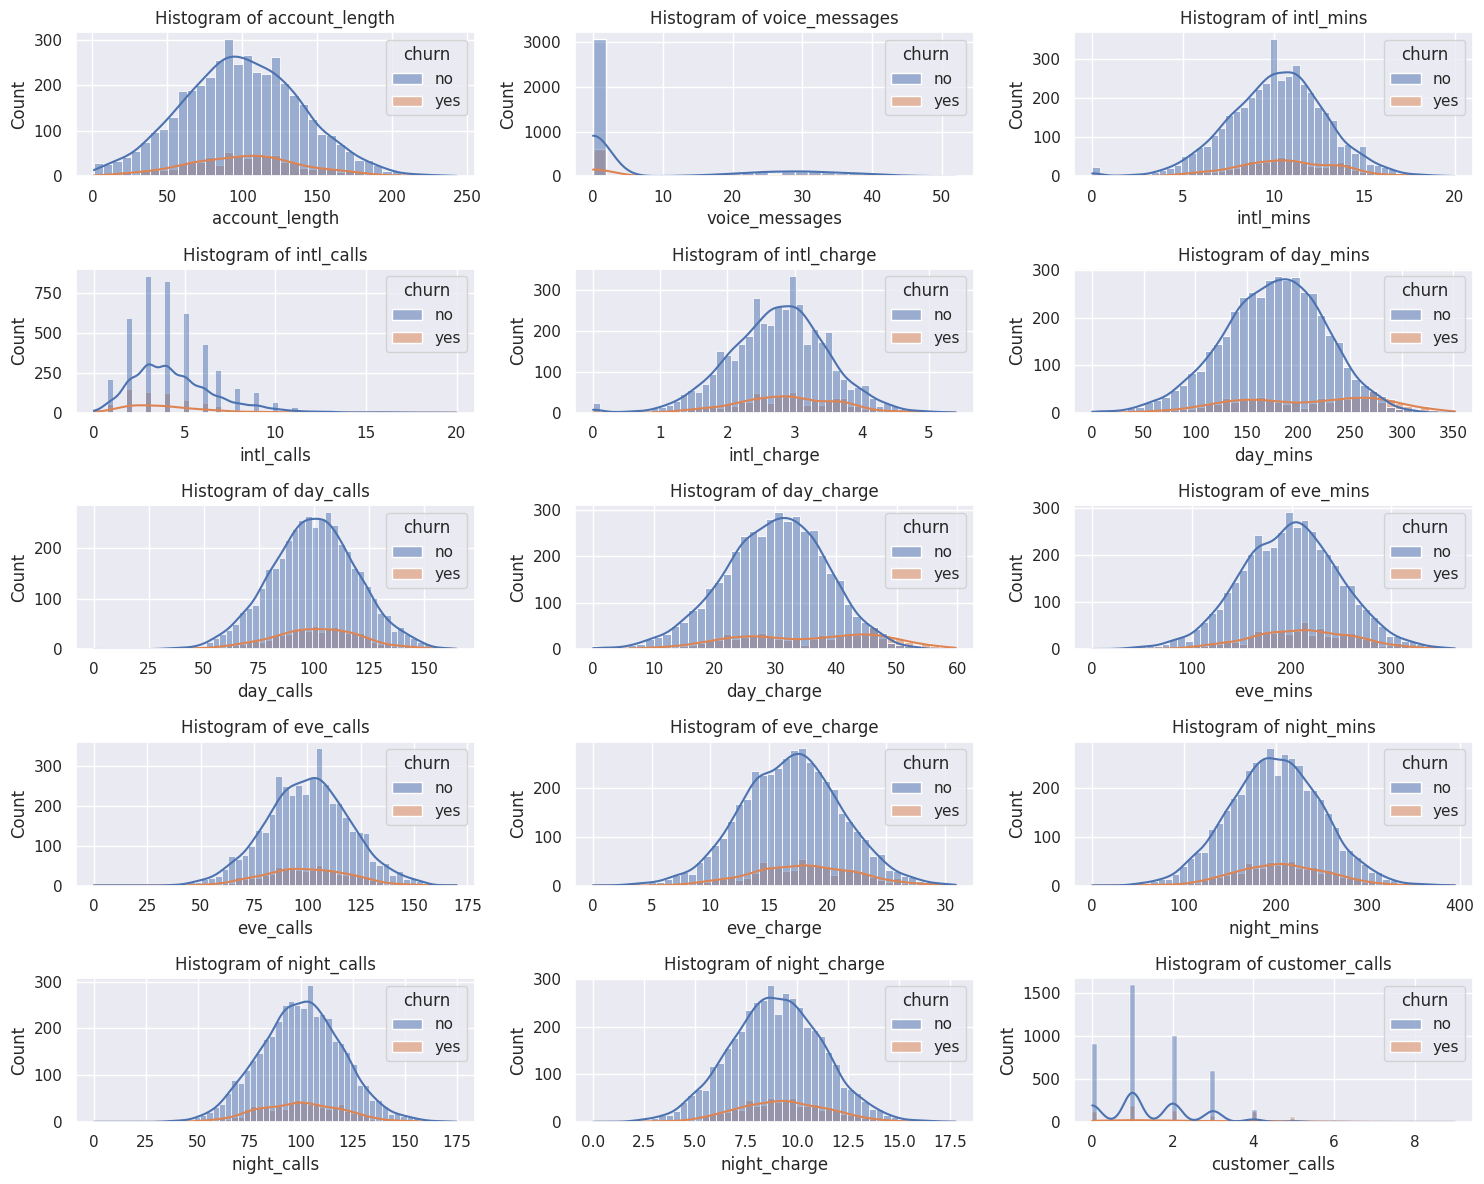

In [363]:
# List of continuous variables
continuous_columns = [
    'account_length', 'voice_messages', 'intl_mins', 'intl_calls', 'intl_charge',
    'day_mins', 'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
    'night_mins', 'night_calls', 'night_charge', 'customer_calls'
]

# Plot histograms for all continuous variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(continuous_columns, 1):
    sns.set_theme(style='darkgrid')
    plt.subplot(5, 3, i)  # Adjust this based on how many variables you have
    sns.histplot(x=df[col],hue=df["churn"], kde=True)  # KDE for smooth distribution curve
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
plt.show()


Histograms for Continuous Variables
Histograms are helpful for visualizing the distribution of continuous variables.

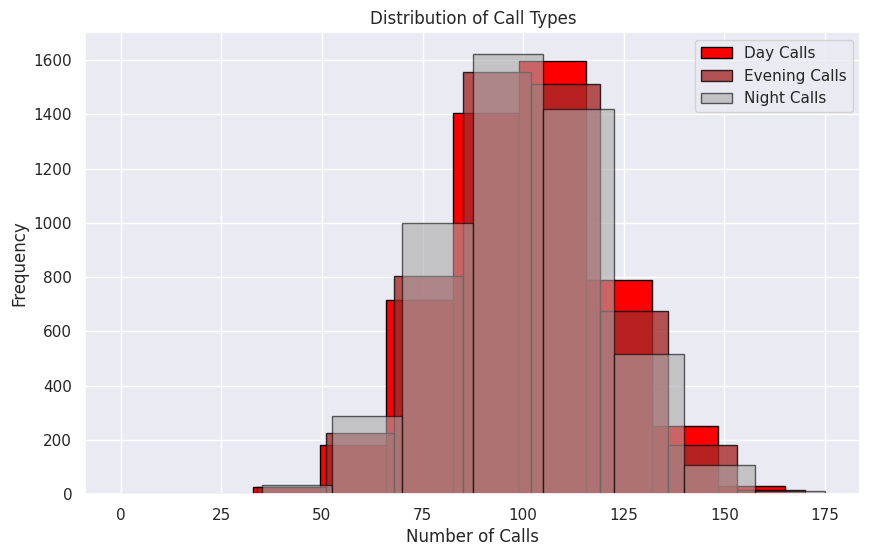

day_calls      100.0294
eve_calls      100.1910
night_calls     99.9192
dtype: float64


In [364]:
plt.figure(figsize=(10,6))
plt.hist(df['day_calls'], label='Day Calls',alpha=1,edgecolor="black",color="red")
plt.hist(df['eve_calls'], label='Evening Calls',alpha=0.8,edgecolor="black",color="brown")
plt.hist(df['night_calls'], label='Night Calls',alpha=0.6,edgecolor="black",color="darkgrey")
plt.title('Distribution of Call Types')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
print(df[["day_calls","eve_calls","night_calls"]].mean())

➡ The amount of calls at each given time is almost same

➡ most of the users made calls between 75-125

➡ it is close to a normal distribution

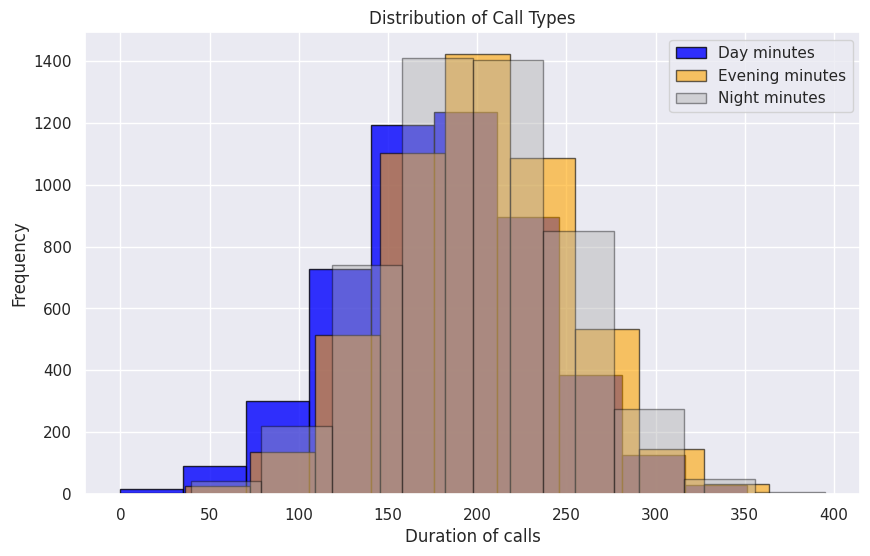

day_mins      180.288900
eve_mins      200.580326
night_mins    200.391620
dtype: float64


In [365]:
plt.figure(figsize=(10,6))
plt.hist(df['day_mins'], label='Day minutes',alpha=0.8,edgecolor="black",color="blue")
plt.hist(df['eve_mins'], label='Evening minutes',alpha=0.6,edgecolor="black",color="orange")
plt.hist(df['night_mins'], label='Night minutes',alpha=0.4,edgecolor="black",color="darkgrey")
plt.title('Distribution of Call Types')
plt.xlabel('Duration of calls')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
print(df[["day_mins","eve_mins","night_mins"]].mean())

▶ On day time can spot a clear difference in duration of call when compared to night call duration

▶ day call are far shorter than night calls

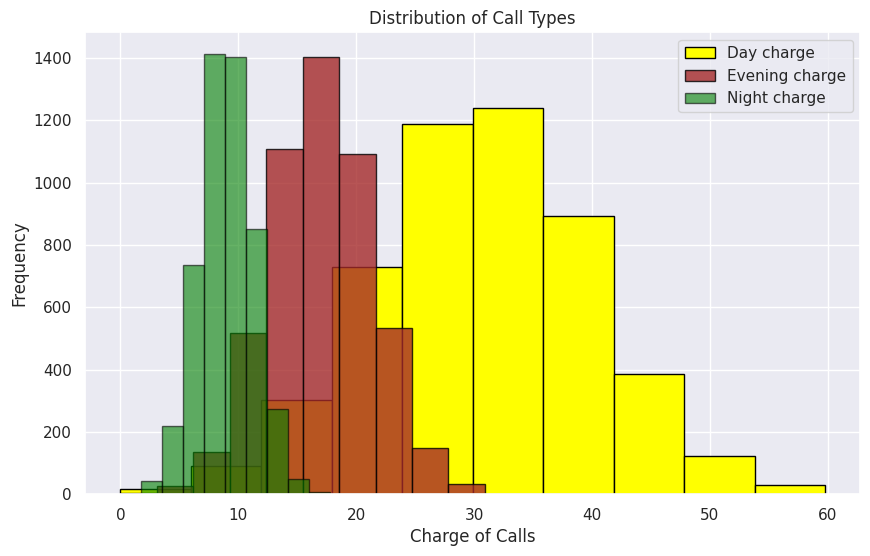

day_charge      30.653501
eve_charge      17.054322
night_charge     9.017732
dtype: float64


In [366]:
plt.figure(figsize=(10,6))
plt.hist(df['day_charge'], label='Day charge',alpha=1,edgecolor="black",color="yellow")
plt.hist(df['eve_charge'], label='Evening charge',alpha=0.8,edgecolor="black",color="brown")
plt.hist(df['night_charge'], label='Night charge',alpha=0.6,edgecolor="black",color="green")
plt.title('Distribution of Call Types')
plt.xlabel('Charge of Calls')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
print(df[["day_charge","eve_charge","night_charge"]].mean())

◼ A clear indication of difference in charge

◼ Day call charge is almost triple of night call charge

◼ Chargers are on low during night

###Boxplot

 Boxplots for Continuous Variables
Boxplots are useful to identify the spread, central tendency, and potential outliers in continuous variables.

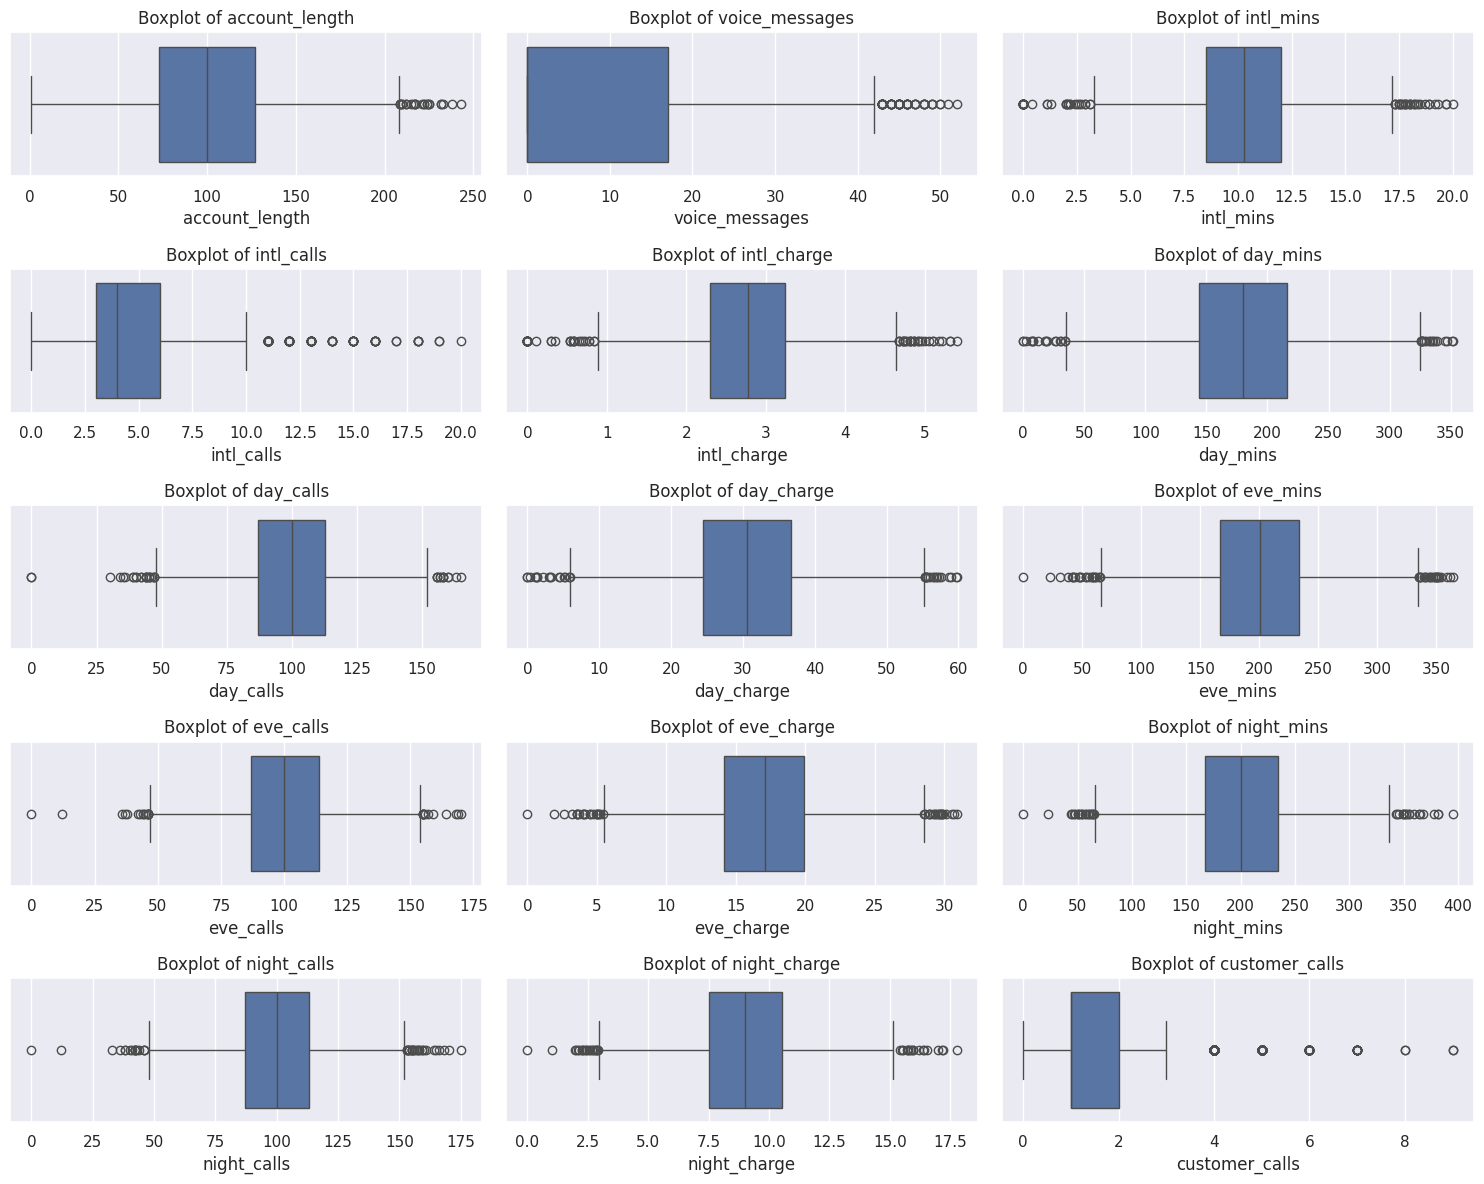

In [367]:
# Plot boxplots for all continuous variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
plt.show()


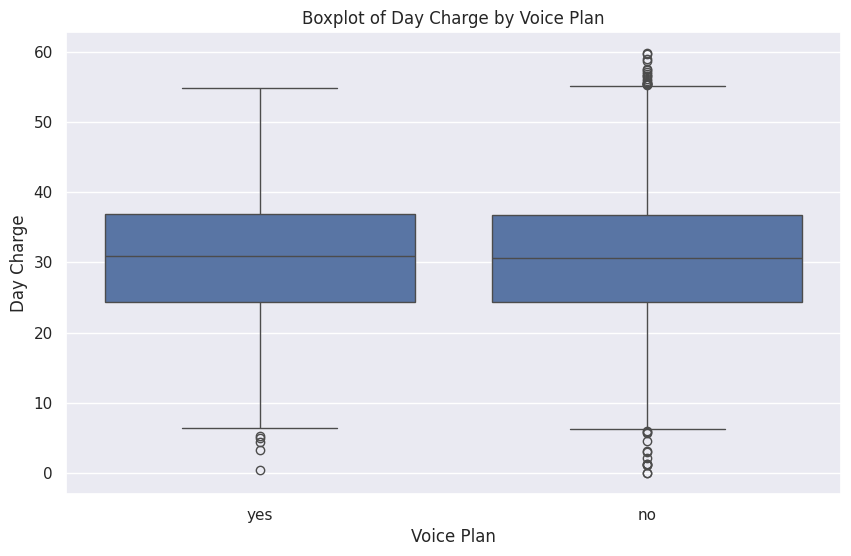

In [368]:
# Boxplot for categorical vs numerical (e.g., 'voice.plan' vs 'day.charge')
plt.figure(figsize=(10, 6))
sns.boxplot(x='voice_plan', y='day_charge', data=df)
plt.title("Boxplot of Day Charge by Voice Plan")
plt.xlabel("Voice Plan")
plt.ylabel("Day Charge")
plt.show()


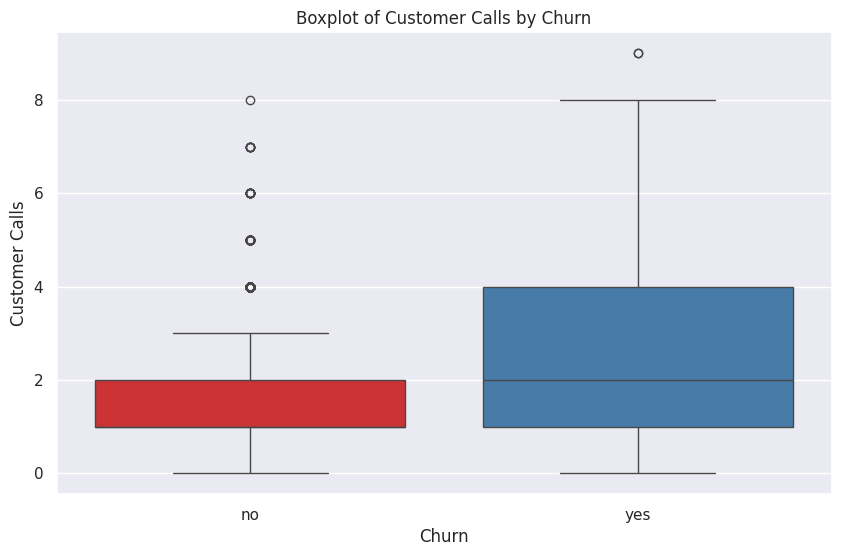

In [369]:
#box plot of customer calls vs churn
plt.figure(figsize=(10,6))
sns.boxplot(x=df["churn"],y=df["customer_calls"],palette='Set1',hue=df['churn'])
plt.title("Boxplot of Customer Calls by Churn")
plt.xlabel("Churn")
plt.ylabel("Customer Calls")
plt.show()

In [370]:
def remove_outliers_iqr_multiple(df, columns):
    cleaned_df = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    return cleaned_df

# List of numeric columns to clean
numeric_columns = ['day_charge', 'intl_charge', 'eve_charge', 'night_charge']

# Apply to all specified columns
cleaned_df = remove_outliers_iqr_multiple(df, numeric_columns)

print("Original data shape:", df.shape)
print("Cleaned data shape:", cleaned_df.shape)

Original data shape: (5000, 20)
Cleaned data shape: (4814, 20)


In [371]:
cleaned_df.describe()

,account_length,voice_messages,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
count,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000,4814.000000
mean,100.126298,7.849398,10.302597,4.452638,2.782223,180.257291,100.019734,30.648266,200.679569,100.171583,17.063552,200.369256,99.826548,9.016730,1.580598
std,39.723497,13.609586,2.566692,2.445105,0.692927,52.456584,19.690231,8.915292,48.769873,19.788390,4.155985,48.788433,19.872198,2.195476,1.312427
min,1.000000,0.000000,3.300000,1.000000,0.890000,35.100000,30.000000,5.970000,65.200000,12.000000,5.540000,65.700000,12.000000,2.960000,0.000000
25%,73.000000,0.000000,8.600000,3.000000,2.320000,143.800000,87.000000,24.465000,167.000000,87.000000,14.190000,167.300000,86.000000,7.530000,1.000000
50%,100.000000,0.000000,10.350000,4.000000,2.795000,180.000000,100.000000,30.610000,201.000000,100.000000,17.110000,200.400000,100.000000,9.020000,1.000000
75%,127.000000,17.000000,12.000000,6.000000,3.240000,215.900000,113.000000,36.700000,233.800000,113.000000,19.887500,233.800000,113.000000,10.520000,2.000000
max,243.000000,52.000000,17.200000,20.000000,4.640000,324.700000,165.000000,55.200000,335.700000,170.000000,28.530000,336.100000,175.000000,15.120000,9.000000


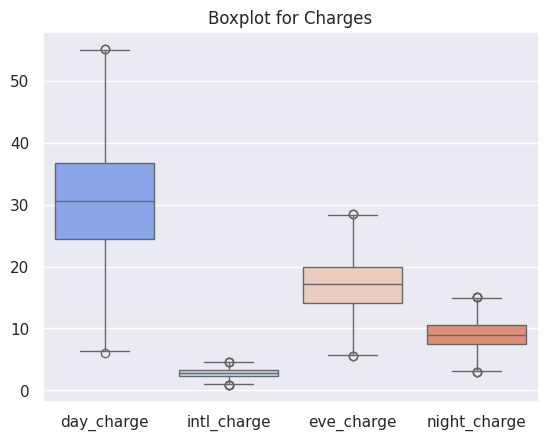

In [372]:
# Boxplot for 'day.charge'
sns.boxplot(cleaned_df[numeric_columns], palette='coolwarm')
plt.title("Boxplot for Charges")
plt.show()


In [373]:
cust_call=cleaned_df['customer_calls'] > 4
cust_call.value_counts()

,count
customer_calls,
False,4668
True,146


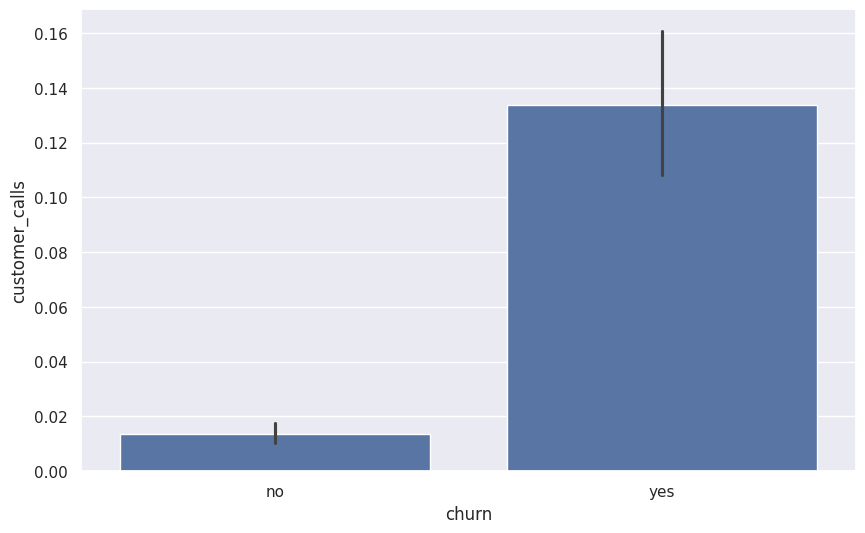

In [374]:
#barchart of cust_call vs churn
plt.figure(figsize=(10,6))
sns.barplot(y=cust_call,x=cleaned_df["churn"])
plt.show()

In [375]:
# low-usage customers
low_usage = df[(df['day_mins'] < 50) & (df['intl_mins'] < 10)]

# Compare churn rates in this group
churn_rate_low_usage = low_usage['churn'].value_counts(normalize=True)
print("Churn rate for low-usage customers:\n", churn_rate_low_usage)


Churn rate for low-usage customers:
 churn
no     0.866667
yes    0.133333
Name: proportion, dtype: float64


In [376]:
churn_rate_cust = cleaned_df[cust_call]['churn'].value_counts(normalize=True)
print("Percentage of customer loss on customer calls:\n", churn_rate_cust*100)

Percentage of customer loss on customer calls:
 churn
yes    60.958904
no     39.041096
Name: proportion, dtype: float64


▶ Customers who called customer service more than 4 times have a 60% churn rate.
 High dissatisfaction among these customers.

###Scatter Plot

Scatter Plots for Continuous Variables
Scatter plots help visualize the relationship between two continuous variables.

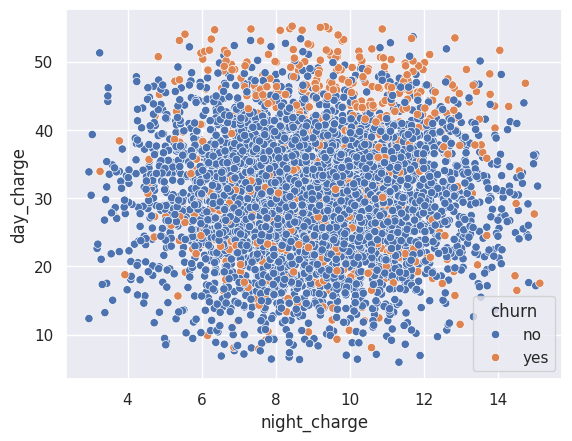

In [377]:
#scatter plot
sns.scatterplot(data=cleaned_df,x="night_charge",y="day_charge",hue="churn")
plt.show()

- as the day charge increases more users left the company
- night charge rate doesn't effect that much to the users
- High charges (day.charge, intl.charge) correlate with churn, especially for low-usage customers.

### Bar Chart

Bar Plots for Categorical Variables
For categorical variables like state, area.code, voice.plan, intl.plan, and churn, bar plots can show the frequency of each category.

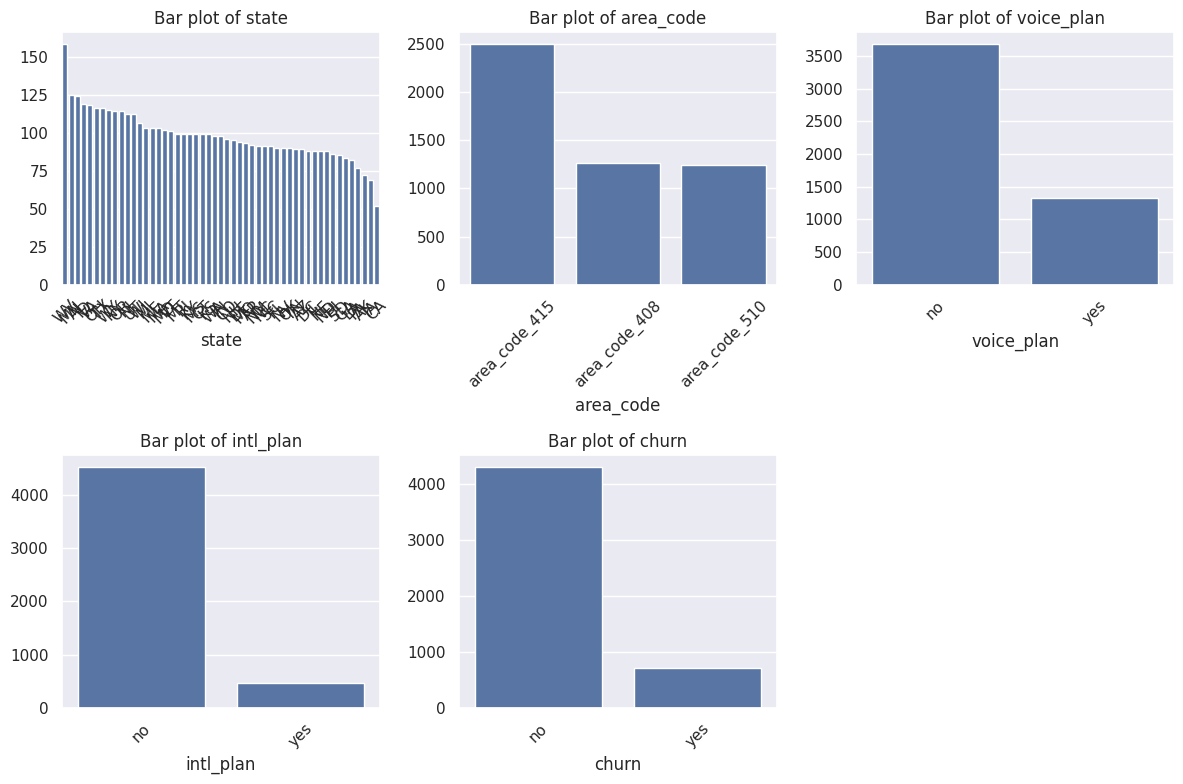

In [379]:
# List of categorical variables
categorical_columns = ['state', 'area_code', 'voice_plan', 'intl_plan', 'churn']

# Plot bar plots for categorical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust this based on how many categorical variables you have
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f"Bar plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


Categorical vs Categorical
 Stacked Bar Plots or Grouped Bar Plots for Categorical vs Categorical
You can compare the frequency distribution of categories between two categorical variables.

For example, comparing voice.plan vs churn:

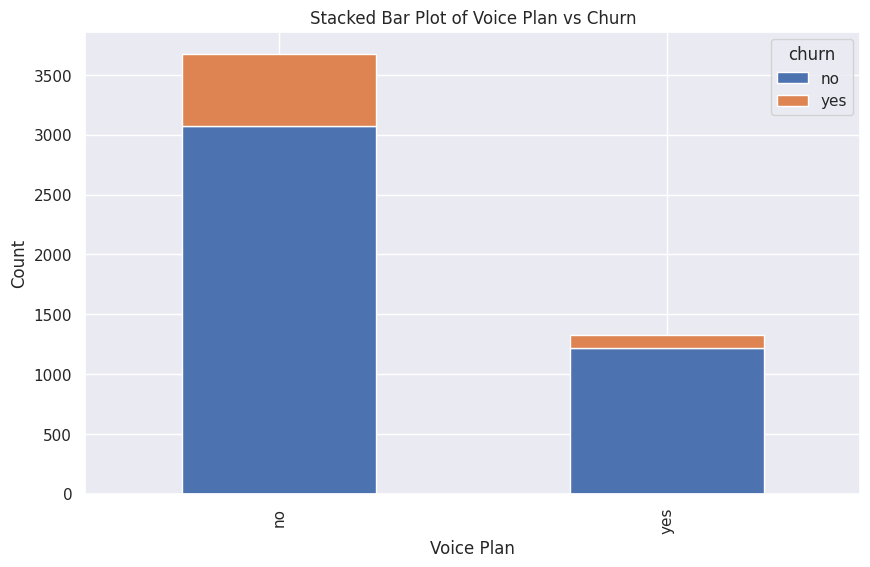

In [380]:
# Stacked bar plot for 'voice.plan' vs 'churn'
pd.crosstab(df['voice_plan'], df['churn']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Stacked Bar Plot of Voice Plan vs Churn")
plt.xlabel("Voice Plan")
plt.ylabel("Count")
plt.show()


In [381]:
#percentage of above stacked bar
pd.crosstab(df['voice_plan'], df['churn'],normalize="index")


churn,no,yes
voice_plan,,
no,0.835464,0.164536
yes,0.922902,0.077098


### violin plot

Violin plots combine aspects of boxplots and density plots, which can provide more information about the distribution and density of the continuous variable.

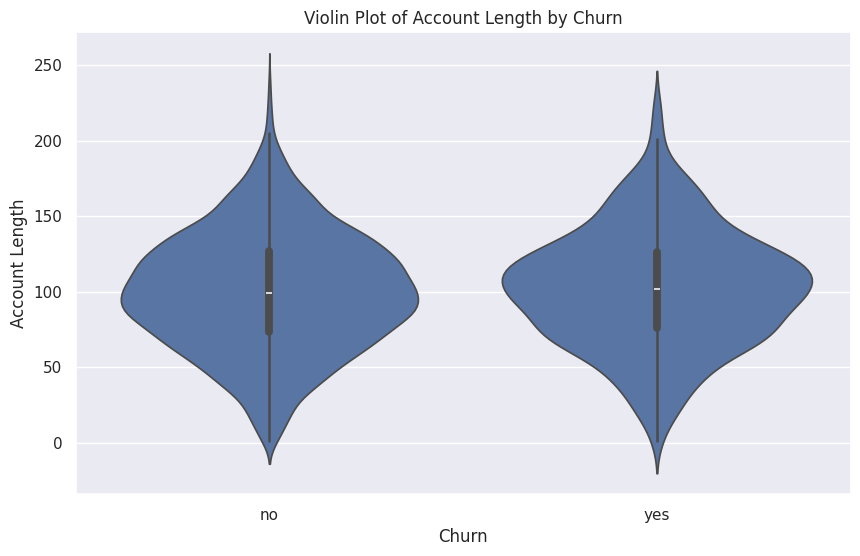

In [382]:
# Violin plot for categorical vs numerical (e.g., 'churn' vs 'account.length')
plt.figure(figsize=(10, 6))
sns.violinplot(x='churn', y='account_length', data=df)
plt.title("Violin Plot of Account Length by Churn")
plt.xlabel("Churn")
plt.ylabel("Account Length")
plt.show()


### Correlation Matrix


In [383]:
# Correlation matrix for continuous variables
corr_matrix = cleaned_df[continuous_columns].corr()
corr_matrix

,account_length,voice_messages,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
account_length,1.000000,-0.012987,0.010063,0.014941,0.010063,-0.006304,0.030304,-0.006072,-0.011078,0.010818,-0.011822,-0.000212,-0.003603,-0.000224,-0.002483
voice_messages,-0.012987,1.000000,-0.000704,-0.000605,-0.000667,0.014755,-0.001143,0.014497,0.020751,-0.004902,0.021330,-0.001900,-0.002146,-0.001910,-0.008934
intl_mins,0.010063,-0.000704,1.000000,-0.008255,0.999991,-0.020925,0.014018,-0.020695,0.001655,-0.008742,0.001718,-0.003884,0.000294,-0.003882,-0.013795
intl_calls,0.014941,-0.000605,-0.008255,1.000000,-0.008136,-0.011038,0.018898,-0.011359,0.014907,0.005403,0.015290,-0.019297,0.003639,-0.019264,-0.018202
intl_charge,0.010063,-0.000667,0.999991,-0.008136,1.000000,-0.020859,0.014091,-0.020631,0.001670,-0.008783,0.001733,-0.003802,0.000267,-0.003800,-0.013864
day_mins,-0.006304,0.014755,-0.020925,-0.011038,-0.020859,1.000000,0.005140,0.999745,-0.002308,0.008511,-0.001898,0.004239,-0.005941,0.004218,0.001458
day_calls,0.030304,-0.001143,0.014018,0.018898,0.014091,0.005140,1.000000,0.004850,0.001291,0.009436,0.002363,0.006965,-0.011090,0.006970,-0.009175
day_charge,-0.006072,0.014497,-0.020695,-0.011359,-0.020631,0.999745,0.004850,1.000000,-0.003000,0.008354,-0.002589,0.003701,-0.005975,0.003680,0.001664
eve_mins,-0.011078,0.020751,0.001655,0.014907,0.001670,-0.002308,0.001291,-0.003000,1.000000,-0.007053,0.997457,-0.021678,0.011738,-0.021686,-0.019646
eve_calls,0.010818,-0.004902,-0.008742,0.005403,-0.008783,0.008511,0.009436,0.008354,-0.007053,1.000000,-0.007246,0.007742,-0.018565,0.007766,-0.000885


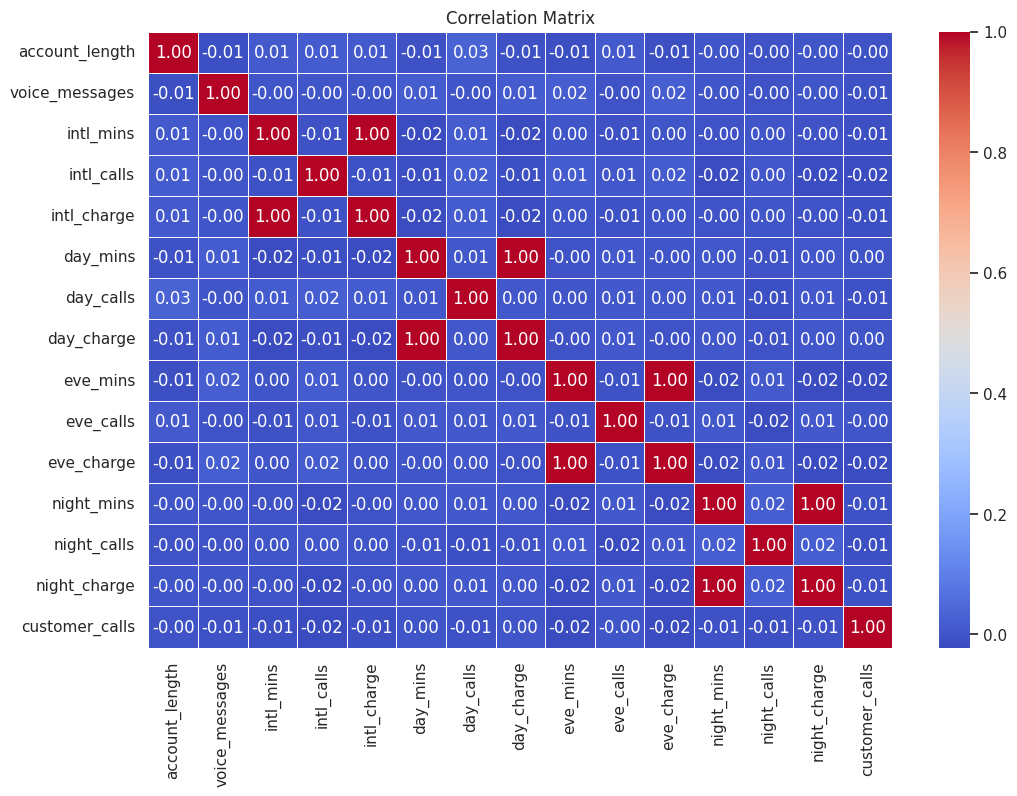

In [384]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


##  Key Observations and Insights

⏺ **Day Charge's Effect on Customer Churn:**

- Observation: Customers are more likely to churn as the day charges increase. This is visually represented in the graph with an orange color indicating higher churn rates for higher day charges.

- Analysis: High day charges may deter low-usage customers or those with alternative options, contributing significantly to churn. This could indicate pricing dissatisfaction or competition in the market.

⏺ **Correlation Between High Charges and Churn:**

- Observation: High charges (for day and international calls) show a strong correlation with churn, particularly among low-usage customers.

- Analysis: Customers with low usage might perceive these charges as unjustified, leading them to seek alternative service providers. This can be a critical insight for targeting retention strategies.
Histogram Analysis of Calls (Day, Evening, Night):

▶ **Number of Calls:** There is no significant variation in the number of calls made during the day, evening, or night. This suggests consistent usage patterns across time periods.

▶ **Call Duration:**
Day: Slightly lower average call duration compared to other periods.
Night: Night charges are significantly lower, approximately one-third of day charges.

- Analysis:
The lower day-call duration may be linked to higher charges, leading customers to limit their usage.

  - The disparity between day and night charges might encourage more night-time usage among cost-conscious customers.

▶ **Descriptive Statistics (df.describe()):**

- Mean Values: The summary statistics of columns like day charge, international charge, and night charge provide numerical confirmation of the disparities observed in the histogram.

- Analysis:
Higher mean day charges vs. night charges underscore why churn is higher for customers incurring significant day charges.
  
  - International call charges may also be a factor influencing churn for customers who frequently call abroad.

⏺ **Customer Service Calls and Churn:**

- Observation: Customers who contacted customer service more than 4 times exhibit a churn rate of approximately 60%.

- Analysis: This reflects high dissatisfaction levels among these customers. Frequent calls to customer service may indicate unresolved issues or poor customer support experiences. It is critical to address these concerns proactively to reduce churn.


# Model Building

### Feature Engineering

In [385]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [386]:
cleaned_df['state']=le.fit_transform(cleaned_df['state'])
cleaned_df['area_code']=le.fit_transform(cleaned_df['area_code'])
cleaned_df['voice_plan']=le.fit_transform(cleaned_df['voice_plan'])
cleaned_df['intl_plan']=le.fit_transform(cleaned_df['intl_plan'])
cleaned_df['day_charge']=le.fit_transform(cleaned_df['day_charge'])
cleaned_df['eve_mins']=le.fit_transform(cleaned_df['eve_mins'])
cleaned_df['churn']=le.fit_transform(cleaned_df['churn'])

▶ All categorical values are converted into Numerical values using Label Encoder

▶ this help us to feed the data into prediction model in machine learning

In [387]:
#scaled data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_data=cleaned_df.select_dtypes(include=np.number).columns
scaled_data=scaler.fit_transform(cleaned_df[num_data])
scaled_data

array([[-0.67444155,  0.00440478,  0.70176594, ...,  0.9079931 ,
        -0.44243099, -0.40069852],
       [ 0.60792974,  0.00440478,  0.17305666, ...,  1.10842607,
        -0.44243099, -0.40069852],
       [ 0.33795684,  0.00440478,  0.92835563, ..., -0.77291072,
        -1.20445702, -0.40069852],
       ...,
       [-1.28188059,  0.00440478, -0.98506843, ...,  0.24747534,
        -0.44243099, -0.40069852],
       [-1.28188059,  1.41804488,  0.22340993, ...,  0.49346126,
        -1.20445702, -0.40069852],
       [ 1.35035522,  0.00440478, -0.35565262, ..., -0.93234604,
        -1.20445702, -0.40069852]])

In [388]:
scaled_data=pd.DataFrame(scaled_data,columns=num_data)

▶ Dataset is now converted into a Standardized format

▶ This helps in creating a more accurate model

In [389]:
scaled_data.corr()

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
state,1.000000,0.014744,0.007059,-0.027257,-0.024995,0.008754,0.001968,0.008704,0.001973,0.008882,-0.004398,0.009238,0.014317,-0.004996,0.012822,0.008625,-0.003968,0.008617,-0.011129,0.007222
area_code,0.014744,1.000000,-0.025825,0.000009,-0.001106,0.027570,0.012316,-0.011796,0.012203,0.001869,-0.004828,0.001004,-0.001644,-0.014491,-0.004825,0.021197,0.018863,0.021196,0.011347,0.000064
account_length,0.007059,-0.025825,1.000000,-0.005490,-0.012987,0.016583,0.010063,0.014941,0.010063,-0.006304,0.030304,-0.003633,-0.010984,0.010818,-0.011822,-0.000212,-0.003603,-0.000224,-0.002483,0.022750
voice_plan,-0.027257,0.000009,-0.005490,1.000000,0.954377,0.012534,0.002552,-0.008061,0.002592,0.011917,-0.004705,0.012285,0.026645,-0.006498,0.025803,-0.002525,0.005630,-0.002531,-0.016381,-0.104909
voice_messages,-0.024995,-0.001106,-0.012987,0.954377,1.000000,0.014808,-0.000704,-0.000605,-0.000667,0.014755,-0.001143,0.015378,0.021822,-0.004902,0.021330,-0.001900,-0.002146,-0.001910,-0.008934,-0.092435
intl_plan,0.008754,0.027570,0.016583,0.012534,0.014808,1.000000,0.023931,-0.001759,0.023888,0.023961,0.016047,0.023398,0.011643,0.000549,0.014575,-0.026091,0.004998,-0.026086,-0.016813,0.256201
intl_mins,0.001968,0.012316,0.010063,0.002552,-0.000704,0.023931,1.000000,-0.008255,0.999991,-0.020925,0.014018,-0.020748,0.005091,-0.008742,0.001718,-0.003884,0.000294,-0.003882,-0.013795,0.055389
intl_calls,0.008704,-0.011796,0.014941,-0.008061,-0.000605,-0.001759,-0.008255,1.000000,-0.008136,-0.011038,0.018898,-0.012364,0.017011,0.005403,0.015290,-0.019297,0.003639,-0.019264,-0.018202,-0.055975
intl_charge,0.001973,0.012203,0.010063,0.002592,-0.000667,0.023888,0.999991,-0.008136,1.000000,-0.020859,0.014091,-0.020682,0.005105,-0.008783,0.001733,-0.003802,0.000267,-0.003800,-0.013864,0.055393
day_mins,0.008882,0.001869,-0.006304,0.011917,0.014755,0.023961,-0.020925,-0.011038,-0.020859,1.000000,0.005140,0.995401,-0.001916,0.008511,-0.001898,0.004239,-0.005941,0.004218,0.001458,0.188462


### Decision tree

In [390]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x=scaled_data.drop("churn",axis=1)
y=cleaned_df["churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [391]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [392]:
#accuracy
dt.score(x_train,y_train)*100

100.0

In [393]:
ypred=dt.predict(x_test)

In [394]:
#accuracy of prediction
dt_acc=accuracy_score(y_test,ypred)
dt_acc

0.9221183800623053

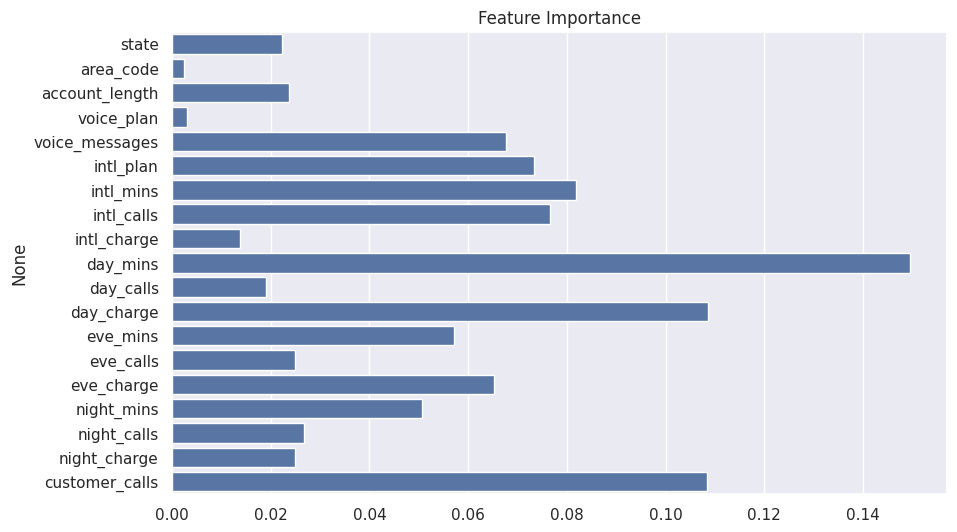

In [395]:
importances = dt.feature_importances_
features = x_train.columns
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

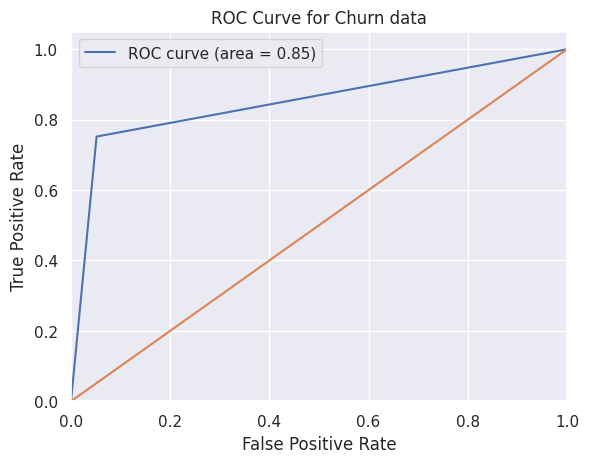

In [396]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn data')
plt.legend()
plt.show()

### Logistic Regression

In [397]:
from sklearn.linear_model import LogisticRegression

In [398]:
#x=scaled_data[["voice.plan","intl.plan",'day.mins',"day.charge","customer.calls"]]
#y=cleaned_df["churn"]

In [399]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [400]:
#accuracy
LR.score(x_train,y_train)*100

87.25006491820307

In [401]:
prediction=LR.predict(x_test)

In [402]:
#accuracy of prediction
LR_acc=accuracy_score(y_test,prediction)
LR_acc

0.8795430944963655

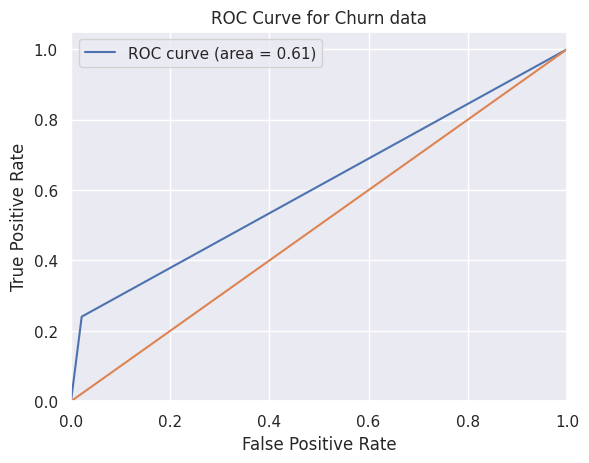

In [403]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn data')
plt.legend()
plt.show()

### Random forest

In [404]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report


In [405]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [406]:
RFC.score(x_train,y_train)

1.0

In [407]:
y_pred=RFC.predict(x_test)

In [408]:
acc=RFC.score(x_test,y_test)
acc

0.9584631360332295

In [409]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       834
           1       0.94      0.74      0.83       129

    accuracy                           0.96       963
   macro avg       0.95      0.86      0.90       963
weighted avg       0.96      0.96      0.96       963



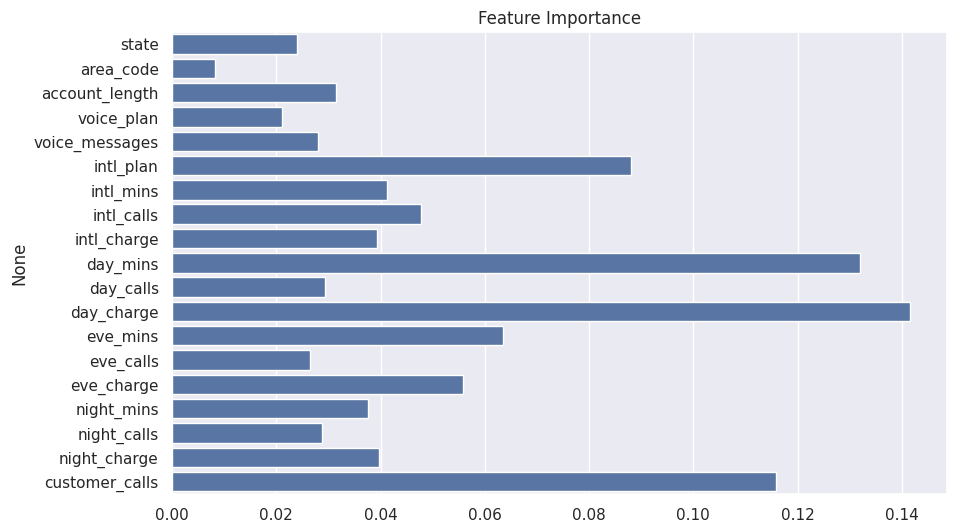

In [410]:
importances = RFC.feature_importances_
features = x_train.columns
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

In [411]:
#roc curve
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_curve


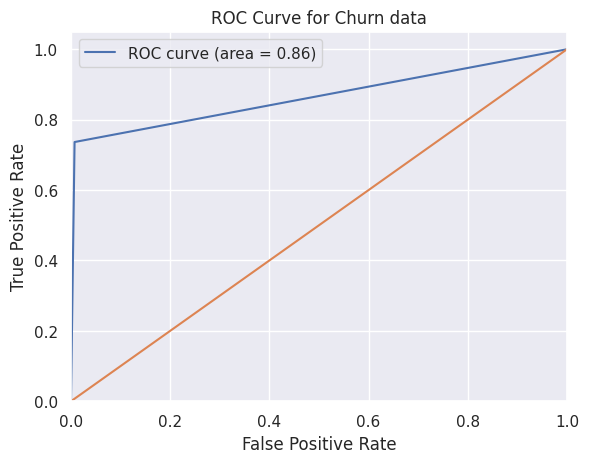

In [412]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn data')
plt.legend()
plt.show()

### LGBM And XGB

In [413]:
import xgboost as xgb
import lightgbm as lgb

In [414]:
xgb_model=xgb.XGBClassifier(learning_rate=0.6,n_estimators=20)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [415]:
xgb_pred=xgb_model.predict(x_test)

In [416]:
xgb_accuracy=accuracy_score(y_test,xgb_pred)
xgb_accuracy

0.9636552440290758

In [417]:
xgb_cm = confusion_matrix(y_test, xgb_pred)

In [418]:
lgb_model=lgb.LGBMClassifier(learning_rate=0.6,n_estimators=35)
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 537, number of negative: 3314
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2461
[LightGBM] [Info] Number of data points in the train set: 3851, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.139444 -> initscore=-1.819913
[LightGBM] [Info] Start training from score -1.819913


LGBMClassifier(learning_rate=0.6, n_estimators=35)

In [419]:
lgb_pred=lgb_model.predict(x_test)

In [420]:
lgb_accuracy=accuracy_score(y_test,lgb_pred)
lgb_accuracy

0.9615784008307373

In [421]:
lgb_cm = confusion_matrix(y_test, lgb_pred)

In [422]:
from sklearn.metrics import confusion_matrix

In [423]:
lgb_cm = confusion_matrix(y_test, lgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

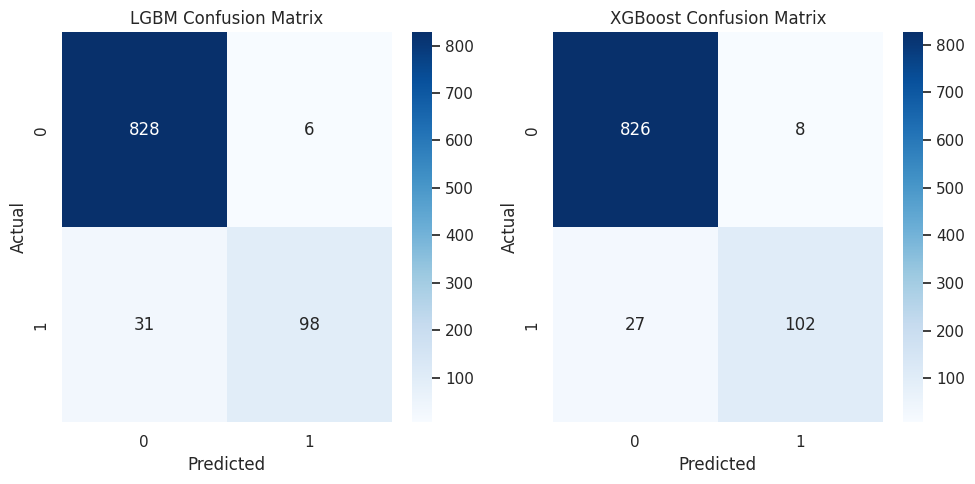

In [424]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(lgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('LGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

## Conclusion of model building


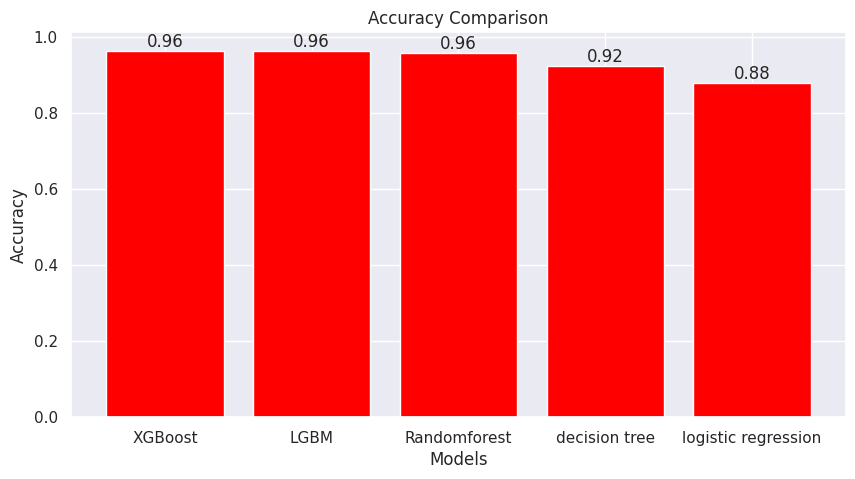

In [425]:
#plot for accuracy comparision
plt.figure(figsize=(10, 5))
x= ['XGBoost','LGBM','Randomforest','decision tree','logistic regression',]
y= [xgb_accuracy,lgb_accuracy,acc,dt_acc,LR_acc,]
plt.bar(x,y,color='red')

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i], 2), ha='center', va='bottom')

addlabels(x,y)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

▶XGBoost has more accuracy **(accuracy of 0.96)**

▶hence, we select **XGBoost**

# Model deployment

In [426]:
import pickle

In [427]:
pickle_out=open('xgb_model.pkl','wb')
pickle.dump(xgb_model,pickle_out)
pickle_out.close()